In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import missingno as msno

ModuleNotFoundError: No module named 'missingno'

In [2]:
# Membaca masing masing data set serta menampilkan 5 sampling data dari setiap data set train dan test
df_train = pd.read_csv('aug_train.csv')
df_test = pd.read_csv('aug_test.csv')
df_train.sample(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
17073,18010,city_28,0.939,Male,Has relevent experience,Full time course,Graduate,STEM,7,NaN,NaN,2,59,0.0
11589,4615,city_21,0.624,NaN,Has relevent experience,no_enrollment,Graduate,STEM,5,10/49,Pvt Ltd,1,144,0.0
559,28829,city_21,0.624,Male,Has relevent experience,Full time course,Graduate,STEM,9,100-500,Pvt Ltd,1,74,1.0
4121,3776,city_136,0.897,Male,No relevent experience,no_enrollment,Masters,STEM,>20,50-99,Public Sector,>4,46,0.0
3786,10871,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,500-999,Pvt Ltd,3,100,0.0


In [3]:
df_test.sample(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
829,6778,city_21,0.624,NaN,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,>4,75
551,15527,city_28,0.939,Male,Has relevent experience,Part time course,High School,NaN,6,10000+,NaN,1,144
768,4364,city_160,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,9,100-500,Funded Startup,1,14
787,27693,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,18,100-500,Pvt Ltd,>4,50
1403,2010,city_114,0.926,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,1000-4999,Pvt Ltd,>4,61


In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             2129 non-null   int64  
 1   city                    2129 non-null   object 
 2   city_development_index  2129 non-null   float64
 3   gender                  1621 non-null   object 
 4   relevent_experience     2129 non-null   object 
 5   enrolled_university     2098 non-null   object 
 6   education_level         2077 non-null   object 
 7   major_discipline        1817 non-null   object 
 8   experience              2124 non-null   object 
 9   company_size            1507 non-null   object 
 10  company_type            1495 non-null   object 
 11  last_new_job            2089 non-null   object 
 12  training_hours          2129 non-null   int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 216.4+ KB


Deskripsi menggunakan fungsi `info()` untuk mengetahui kondisi dari dataset (tipe data, adanya nilai null, hingga jumlah baris)
- Terdapat 2129 rows
- Tidak ada kolom yang mempunyai nilai NULL, sehingga tidak diperlukan drop null values

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

Deskripsi menggunakan fungsi `info()` untuk mengetahui kondisi dari dataset (tipe data, adanya nilai null, hingga jumlah baris)
- Terdapat 19158 rows
- Tidak ada kolom yang mempunyai nilai NULL, sehingga tidak diperlukan drop null values

# Variabel  Numerik

In [6]:
df_test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
enrollee_id,2129.0,16861.614843,9576.846029,3.000,8562.000,16816.000,25129.00,33353.000
city_development_index,2129.0,0.824984,0.125074,0.448,0.698,0.903,0.92,0.949
training_hours,2129.0,64.983091,60.238660,1.000,23.000,47.000,86.00,334.000


In [7]:
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
enrollee_id,19158.0,16875.358179,9616.292592,1.000,8554.25,16982.500,25169.75,33380.000
city_development_index,19158.0,0.828848,0.123362,0.448,0.74,0.903,0.92,0.949
training_hours,19158.0,65.366896,60.058462,1.000,23.00,47.000,88.00,336.000
target,19158.0,0.249348,0.432647,0.000,0.00,0.000,0.00,1.000


In [8]:
df_train['target'].value_counts()

0.0    14381
1.0     4777
Name: target, dtype: int64

# Univariate Analyst

<Axes: ylabel='city_development_index'>

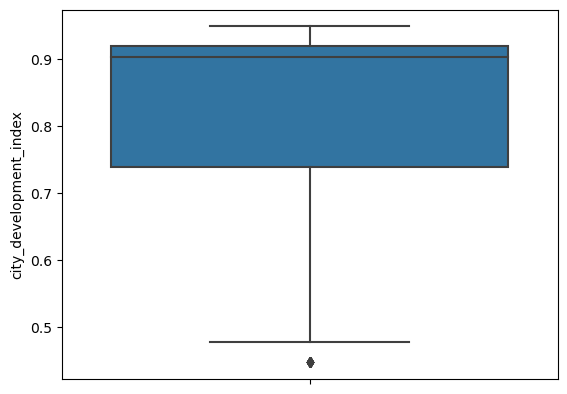

In [9]:
sns.boxplot(data=df_train, y='city_development_index')

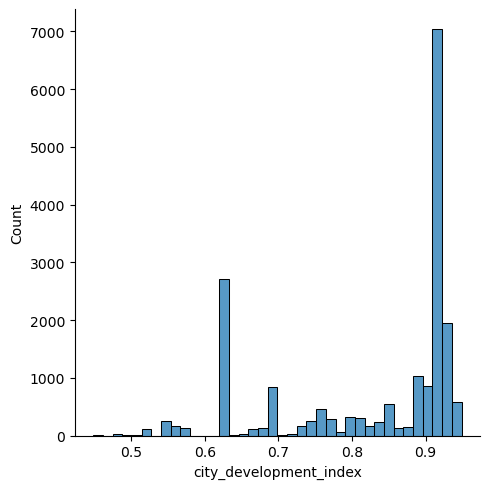

In [10]:
sns.displot(data=df_train, x='city_development_index')

<Axes: ylabel='training_hours'>

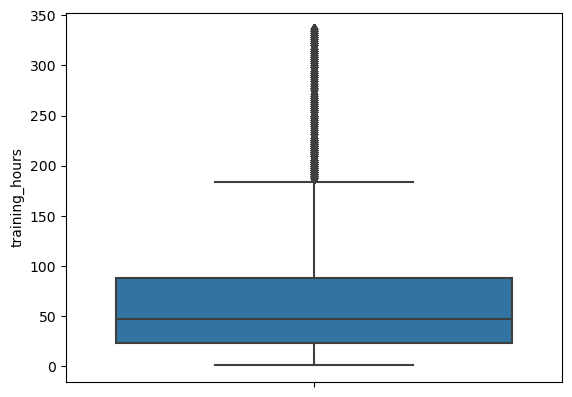

In [11]:
sns.boxplot(data=df_train, y='training_hours')

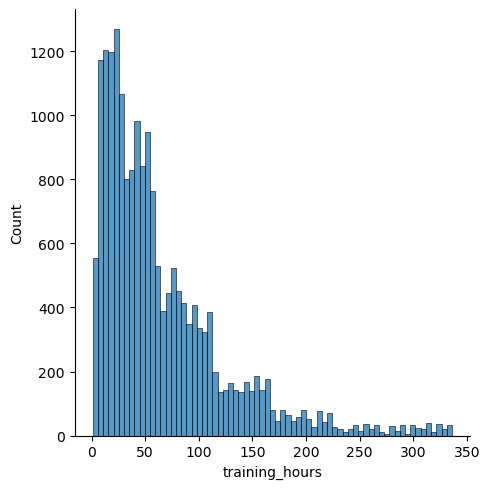

In [12]:
sns.displot(data=df_train, x='training_hours')

# Multivariate Analysis

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26660\2347644391.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr(), cmap='Blues', annot=True, fmt='.2f')


<Axes: >

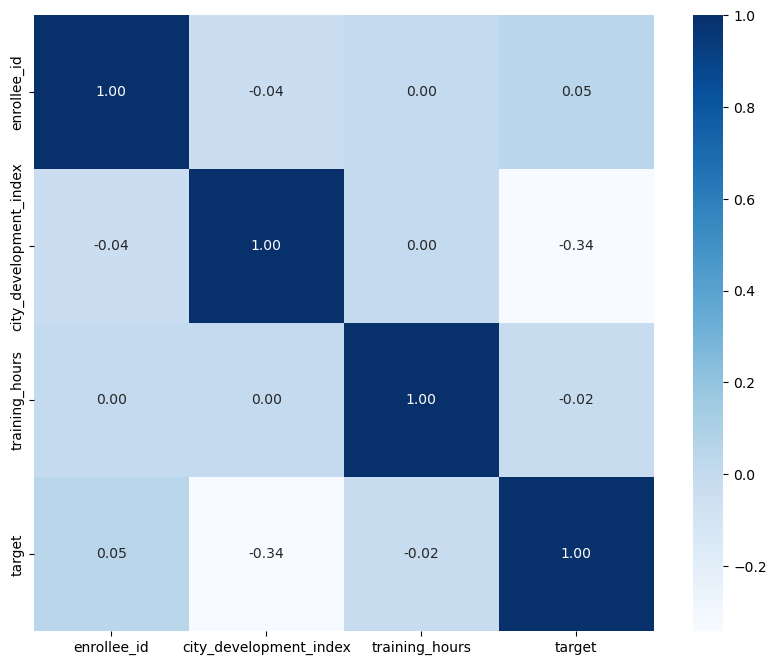

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_train.corr(), cmap='Blues', annot=True, fmt='.2f')

# Preprocessing

### Missing Values

In [14]:
df_train.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [15]:
df_train.shape

(19158, 14)

Terdapat 
- 4508 row missing value pada gender 
- 386 row missing value pada enrolled_university
- 460 row missing value pada education_level
- 2813 row missing value pada major_discipline
- 65 row missing value pada enrolled_university
- 5938 row missing value pada company_size
- 6140 row missing value pada company_type
- 423 row missing value pada last_new_job

Banyak sekali missing value sehingga kalau misal kita hapus akan sangat berpengaruh sekali ke dalam data

### Duplicate Values

In [16]:
df_train.duplicated().sum()

0

### Outliers

In [17]:
features = df_train.select_dtypes(["float64", "int64", "boolean"]).columns

for f in features:
    Q1 = df_train[f].quantile(0.25)
    Q3 = df_train[f].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (1.5 * IQR)
    high_limit = Q3 + (1.5 * IQR)
    filtered_entries = ((df_train[f] >= low_limit) & (df_train[f] <= high_limit))
    df = df_train[filtered_entries]
df.shape

(14381, 14)

In [18]:
total_null = df_train.isnull().sum().sort_values(ascending = False)
percent = ((df_train.isnull().sum()/df_train.isnull().count())*100).sort_values(ascending = False)
print("Total records = ", df_train.shape[0])

missing_data = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
missing_data

Total records =  19158


,Total Missing,In Percent
company_type,6140,32.05
company_size,5938,30.99
gender,4508,23.53
major_discipline,2813,14.68
education_level,460,2.40
last_new_job,423,2.21
enrolled_university,386,2.01
experience,65,0.34
enrollee_id,0,0.00
city,0,0.00


In [26]:
import missingno as msno
msno.matrix(df_train)
plt.figure(figsize = (15,9))
plt.show()

ModuleNotFoundError: No module named 'missingno'

In [19]:
print("Company Type: ", df_train['company_type'].unique().tolist())
print("Company Size: ",df_train['company_size'].unique().tolist())
print("Gender: ",df_train['gender'].unique().tolist())
print("Major Discipline: ",df_train['major_discipline'].unique().tolist())
print("Education Level: ",df_train['education_level'].unique().tolist())
print("Last New Job: ",df_train['last_new_job'].unique().tolist())
print("Enrolled University: ",df_train['enrolled_university'].unique().tolist())
print("Experience: ",df_train['experience'].unique().tolist())

Company Type:  [nan, 'Pvt Ltd', 'Funded Startup', 'Early Stage Startup', 'Other', 'Public Sector', 'NGO']
Company Size:  [nan, '50-99', '<10', '10000+', '5000-9999', '1000-4999', '10/49', '100-500', '500-999']
Gender:  ['Male', nan, 'Female', 'Other']
Major Discipline:  ['STEM', 'Business Degree', nan, 'Arts', 'Humanities', 'No Major', 'Other']
Education Level:  ['Graduate', 'Masters', 'High School', nan, 'Phd', 'Primary School']
Last New Job:  ['1', '>4', 'never', '4', '3', '2', nan]
Enrolled University:  ['no_enrollment', 'Full time course', nan, 'Part time course']
Experience:  ['>20', '15', '5', '<1', '11', '13', '7', '17', '2', '16', '1', '4', '10', '14', '18', '19', '12', '3', '6', '9', '8', '20', nan]


In [20]:
import numpy as np
data = df_train.replace(np.nan, 'Other')

In [21]:
print("Company Type: ", data['company_type'].unique().tolist())
print("Company Size: ",data['company_size'].unique().tolist())
print("Gender: ",data['gender'].unique().tolist())
print("Major Discipline: ",data['major_discipline'].unique().tolist())
print("Education Level: ",data['education_level'].unique().tolist())
print("Last New Job: ",data['last_new_job'].unique().tolist())
print("Enrolled University: ",data['enrolled_university'].unique().tolist())
print("Experience: ",data['experience'].unique().tolist())

Company Type:  ['Other', 'Pvt Ltd', 'Funded Startup', 'Early Stage Startup', 'Public Sector', 'NGO']
Company Size:  ['Other', '50-99', '<10', '10000+', '5000-9999', '1000-4999', '10/49', '100-500', '500-999']
Gender:  ['Male', 'Other', 'Female']
Major Discipline:  ['STEM', 'Business Degree', 'Other', 'Arts', 'Humanities', 'No Major']
Education Level:  ['Graduate', 'Masters', 'High School', 'Other', 'Phd', 'Primary School']
Last New Job:  ['1', '>4', 'never', '4', '3', '2', 'Other']
Enrolled University:  ['no_enrollment', 'Full time course', 'Other', 'Part time course']
Experience:  ['>20', '15', '5', '<1', '11', '13', '7', '17', '2', '16', '1', '4', '10', '14', '18', '19', '12', '3', '6', '9', '8', '20', 'Other']


In [22]:
df_train.groupby('education_level',dropna=False)['target'].agg(['count','mean'])

,count,mean
education_level,,
Graduate,11598,0.279790
High School,2017,0.195340
Masters,4361,0.214400
Phd,414,0.140097
Primary School,308,0.133117
NaN,460,0.226087


In [23]:
df.isnull().mean().sort_values(ascending=False)

company_type              0.261178
company_size              0.245324
gender                    0.216883
major_discipline          0.157430
education_level           0.024755
last_new_job              0.018705
enrolled_university       0.018288
experience                0.002921
enrollee_id               0.000000
city                      0.000000
city_development_index    0.000000
relevent_experience       0.000000
training_hours            0.000000
target                    0.000000
dtype: float64

In [24]:
df_train['training_hours_bins'] = pd.cut(df['training_hours'],5)

In [25]:
df_train.groupby('training_hours_bins',dropna=False)['target'].agg(['count','mean'])

,count,mean
training_hours_bins,,
"(0.665, 68.0]",9344,0.0
"(68.0, 135.0]",3308,0.0
"(135.0, 202.0]",1103,0.0
"(202.0, 269.0]",373,0.0
"(269.0, 336.0]",253,0.0
